# 神经网络基本原理

## 1 梯度下降法

## 2 分类算法


## 3 反向传播算法
 
本小节介绍反向传播算法


### 3.1 隐藏层的训练

本小节的神经网络由以下三个部分构成：一个输入神经元；一个神经元的非线性隐藏层；一个输出神经元。

![ANN3](./14-L7-Neural-network/SimpleANN03.png)



In [1]:

%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import numpy as np  
import matplotlib
import matplotlib.pyplot as plt  
from matplotlib import cm 
from matplotlib.colors import colorConverter, ListedColormap
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D 
import seaborn as sns  


sns.set_style('darkgrid')

np.random.seed(seed=4)


### 3.2 生成样本数据

C类，蓝色，正态分布，对于t=1
D类，红色，正态分布的叠加，均值分别为-2和2, 对应t=0

这类数据无法利用线性分类器分类，通过添加隐藏层（非线性激活函数），训练神经网络为非线性分类器

In [2]:
# 生成样本数据集
N_c, N_d = 20, 20  # 样本数类型C和D
# C类，中间，D类，二元分布，左侧与右侧均分
c_mean = 0  # 类型C的平均值
d1_mean = -2  # 类型D的平均值，左侧数据 
d2_mean = 2  # 类型D的平均值， 右侧数据 

std_dev = 0.5  # 类型C和D的标准差
# 
xs_c = np.random.randn(N_c, 1) * std_dev + c_mean
#  左侧样本，右侧样本，红色
xs_d = np.vstack((np.random.randn(N_d//2, 1) * std_dev + d1_mean,
    np.random.randn(N_d//2, 1) * std_dev + d2_mean))


x = np.vstack((xs_c, xs_d))
t = np.vstack((np.ones((xs_c.shape[0], 1)), np.zeros((xs_d.shape[0], 1))))


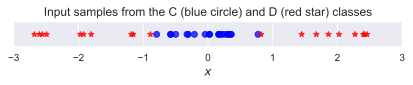

In [3]:

fig = plt.figure(figsize=(7, 1))
plt.xlim(-3,3)
plt.ylim(-1,1)
# Plot samples
plt.plot(xs_c, np.zeros_like(xs_c), 'bo', alpha=0.75)
plt.plot(xs_d, np.zeros_like(xs_d), 'r*', alpha=0.75)
plt.gca().axes.get_yaxis().set_visible(False)
plt.title('Input samples from the C (blue circle) and D (red star) classes')
plt.xlabel('$x$', fontsize=12)
fig.subplots_adjust(bottom=0.4, top=0.75)
plt.show()
#

### 3.3 非线性激活函数 

本小节的隐藏神经元的非线性激活函数使用高斯经向基函数（Gaussian Radial Basis Function, RBF）。RBF在神经网络中不常用，但是在本案例中，该函数的非线性能够构建非线性分类器处理本案例的数据。 

$$
\phi(z_h) =e^{-z_h^2} 
$$
$$
\frac{d\phi(z_h)}{d z_h} = -2z_h\phi(z_h)
$$

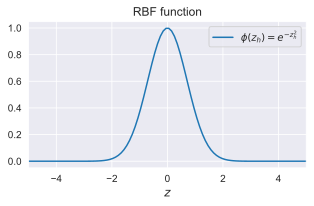

In [4]:
def rbf(zh):
    """RBF 激活函数"""
    return np.exp(-zh**2)
zhs = np.linspace(-5, 5, 100)
fig = plt.figure(figsize=(5, 3))
plt.plot(zhs, rbf(zhs), label='$\phi(z_h)=e^{-z_h^2}$')
plt.xlabel('$z$', fontsize=12)
plt.title('RBF function')
plt.legend()
plt.xlim(-5, 5)
fig.subplots_adjust(bottom=0.2)
plt.show()

### 3.4 利用反向传播优化神经网络

本小节利用反向传播算法优化神经网络，每次迭代由以下两部组成：
- 正向传播计算神经网络预测结果
- 神经网络输出神经元的误差反向传播，修正各神经元参数。

![ANN3](./14-L7-Neural-network/SimpleANN03.png)


#### 3.4.1 正向传播

- 隐藏层的激活
$$
\mathbf{h}=\text{RBF}(\mathbf{x}\cdot \mathbf{w}_h)=e^{-(\mathbf{x}\cdot \mathbf{w}_h)^2}
$$

- 输出的激活

隐藏层的激活$\mathbf{h}$作为逻辑分类函数的输入，
$$
\mathbf{y}=\sigma(\mathbf{h}+\mathbf{b}_0) = \frac{1}{1+e^{-(\mathbf{h}+\mathbf{b}_0)}}
$$
其中，$\mathbf{b}_0$为神经网络的偏置。



In [9]:
def logistic(zo):
    """逻辑分类函数"""
    return 1. / (1. + np.exp(-zo))


def hidden_activations(x, wh):
    """隐藏层激活函数RBF."""
    return rbf(x * wh)


def output_activations(h , bo):
    """逻辑分类激活."""
    return logistic(h + bo)


def nn(x, wh, bo):
    """神经网络函数"""
    return output_activations(hidden_activations(x, wh), bo)


def nn_predict(x, wh, bo):
    """神经网络预测函数，返回0或1"""
    return np.around(nn(x, wh, bo))

#### 3.4.2 反向传播

#### 3.4.2.1  损失函数
本案例采用交叉熵损失函数，定义如下
$$
L(t_i,y_i)=-[t_i\log y_i+ (1-t_i)\log(1-y_i)]
$$


In [7]:
def loss(y, t):
    """交叉熵损失函数"""
    return -np.mean(
        (t * np.log(y)) + ((1-t) * np.log(1-y)))

 
def loss_for_param(x, wh, bo, t):
    """基于参数的损失函数"""
    return loss(nn(x, wh, bo) , t)


/var/folders/_g/qrb_wrl10t355t8pxv072fqh0000gn/T/ipykernel_30272/2109144759.py:23: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(surf, pad=0.15)


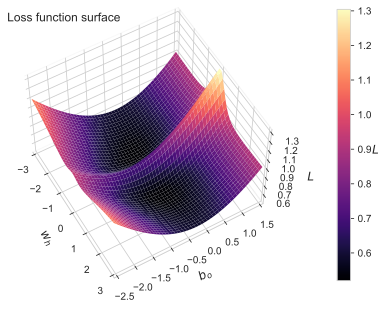

In [10]:

grid_size = 50 #
wsh = np.linspace(-3, 3, num=grid_size) 
bso = np.linspace(-2.5, 1.5, num=grid_size) 
params_x, params_y = np.meshgrid(wsh, bso) 
#
loss_grid = np.zeros((grid_size, grid_size))

for i in range(grid_size):
    for j in range(grid_size):
        loss_grid[i,j] = loss(
            nn(x, params_x[i,j], params_y[i,j]) , t)

fig = plt.figure(figsize=(7, 5))
with sns.axes_style("whitegrid"):
    ax = fig.add_subplot(1, 1, 1, projection='3d')

    surf = ax.plot_surface(
        params_x, params_y, loss_grid, linewidth=0, cmap=cm.magma)
    ax.view_init(elev=55, azim=-30)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    cbar = fig.colorbar(surf, pad=0.15)
    ax.set_xlabel('$w_h$', fontsize=12)
    ax.set_ylabel('$b_o$', fontsize=12)
    ax.set_zlabel('$L$', fontsize=12)
    ax.set_ylim(-2.5, 1.5)
    ax.set_xlim(-3, 3)
    cbar.ax.set_ylabel('$L$', fontsize=12, rotation=0)
    ax.set_title('Loss function surface', loc='left', y=1.0, pad=-12)
plt.show()
#

#### 3.4.2.2  损失函数的梯度


![ANN3](./14-L7-Neural-network/SimpleANN03.png)

- 更新输出层，参数——$b_0$

\begin{align}
\frac{\partial L_i}{\partial b_o}& =\frac{\partial L_i}{\partial y_i}\frac{\partial y_i}{ \partial z_{oi}}\frac{\partial z_{oi}}{\partial b_o}= y_i-t_i=\delta_{oi} \\
\frac{\partial L_i}{\partial y_i} &= \frac{y_i-t_i}{y_i(1-y_i)}  \\
\frac{\partial y_i}{ \partial z_{oi}} & = y_i(1-y_i) \\
\frac{\partial z_{oi}}{\partial b_o} & =1 
\end{align}


$\partial L_i/\partial z_{oi} = \delta_{oi}$ 是损失函数在神经网络输出层相对输入变量的梯度。

- 更新隐藏层，参数——$\mathbf{w}$


\begin{align}
\frac{\partial L_i}{\partial w_h}& =\frac{\partial L_i}{\partial h_i}\frac{\partial h_i}{ \partial z_{hi}}\frac{\partial z_{hi}}{\partial w_h}= \frac{\partial L_i}{ \partial z_{hi}}\frac{\partial z_{hi}}{\partial w_h} = x_i\delta_{hi}  \\
\frac{\partial L_i}{\partial z_{hi}}& =\frac{\partial L_i}{\partial z_{oi}}\frac{\partial z_{oi}}{\partial h_{i}}\frac{\partial h_i}{\partial z_{hi}}=-2z_{hi}h_i(y_i-ti)=-2z_{hi}h_i\delta_{oi}\\
\frac{\partial z_{hi}}{\partial w_h} & =  x_i  
\end{align}



$\partial L_i/\partial z_{hi}=\delta_{hi}$ 是损失函数在神经网络隐藏层相对输入变量的梯度


In [11]:
def gradient_output(y, t):
    """输出层： 损失函数的梯度."""
    return y - t


def gradient_bias_out(grad_output): 
    """输出层 基于偏置的梯度"""
    return grad_output


def gradient_hidden(grad_output):
    """隐藏层 梯度"""
    return grad_output


def gradient_weight_hidden(x, zh, h, grad_hidden):
    """ 隐藏层：相对权重的梯度 wh."""
    return x * -2 * zh * h * grad_hidden


#### 3.4.2.3  反向传播更新 

基于损失函数相对参数的梯度，可利用梯度下降法计算参数的迭代更新，具体方式如下：

\begin{align}
w_h(k+1)& =w_h(k)-\Delta w_h(k) \\
\Delta w_h(k) & =\eta \frac{\partial L}{\partial w_h }
\end{align}

\begin{align}
b_o(k+1)& =b_o(k)-\Delta b_o(k) \\
\Delta b_o(k) & =\eta \frac{\partial L}{\partial b_o }
\end{align}


In [10]:
def backprop_update(x, t, wh, bo, learning_rate):
    """ 一次迭代中，更新参数 bo和 wh """
    # Compute the output of the network
    # This can be done with y = nn(x, wh, bo), but we need
    #  the intermediate h and zh for the weight updates.
    zh = x * wh
    h = rbf(zh)  # h = hidden_activations(x, wh)
    y = output_activations(h, bo)
    # Compute the gradient at the output
    grad_output = gradient_output(y, t)
    # Get the delta for bo
    d_bo = learning_rate * gradient_bias_out(grad_output)
    # Compute the gradient at the hidden layer
    grad_hidden = gradient_hidden(grad_output)
    # Get the delta for wh
    d_wh = learning_rate * gradient_weight_hidden(
        x, zh, h, grad_hidden)
    # return the update parameters
    return float(np.mean(wh-d_wh)), float(np.mean(bo-d_bo))

In [11]:
# Run backpropagation
# Set the initial weight parameter
wh = 2.3  # Randomly decided
bo = 1.4  # Randomly decided
# Set the learning rate
learning_rate = 2.0

# Start the gradient descent updates and plot the iterations
nb_of_iterations = 20  # number of gradient descent updates
# List to store the weight values for later vizualization
params_loss = [(wh, bo, loss_for_param(x, wh, bo, t))]
for i in range(nb_of_iterations):
    # Update the weights via backpropagation
    wh, bo = backprop_update(x, t, wh, bo, learning_rate)
    # Store the values for plotting
    params_loss.append((wh, bo, loss_for_param(x, wh, bo, t)))

# Print the final loss
final_loss = loss_for_param(x, wh, bo, t)
print(f'final loss is {final_loss:.2f} for weights',
      f'wh={wh:.2f} and bo={bo:.2f}')

final loss is 0.52 for weights wh=1.12 and bo=-0.44


/var/folders/_g/qrb_wrl10t355t8pxv072fqh0000gn/T/ipykernel_58087/2873672236.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(surf, pad=0.15)


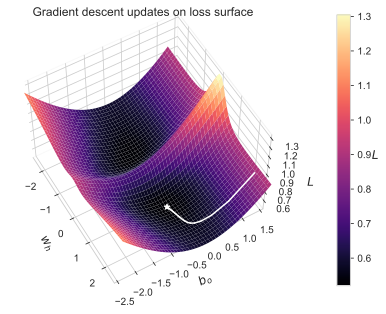

In [12]:
# Plot the weight updates on the error surface
# Plot the error surface
fig = plt.figure(figsize=(7, 5))
with sns.axes_style("whitegrid"):
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    surf = ax.plot_surface(
        params_x, params_y, loss_grid, linewidth=0, cmap=cm.magma)
    ax.view_init(elev=55, azim=-30)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    cbar = fig.colorbar(surf, pad=0.15)
    cbar.ax.set_ylabel('$L$', fontsize=12, rotation=0)

    # Plot the updates
    for i in range(1, len(params_loss)):
        wh1, bo1, l1 = params_loss[i-1]
        wh2, bo2, l2 = params_loss[i]
        # Plot the update 
        ax.plot([wh1, wh2], [bo1, bo2], [l1, l2], 'w-')
    ax.plot(*params_loss[-1], color='w', marker='*')
    # Show figure
    ax.set_xlabel('$w_h$', fontsize=12)
    ax.set_ylabel('$b_o$', fontsize=12)
    ax.set_zlabel('$L$', fontsize=12)
    ax.set_ylim(-2.5, 1.5)
    ax.set_xlim(-2.5, 2.5)
    ax.set_title('Gradient descent updates on loss surface', pad=-1)
plt.show()
#

###  3.4 分类器的可视化

样本数据无法在线性分类器中实现分类，但是基于高斯经向基函数的变换，神经网络添加非线性隐藏层，将输入函数转换到隐藏层的空间，从而实现分类。

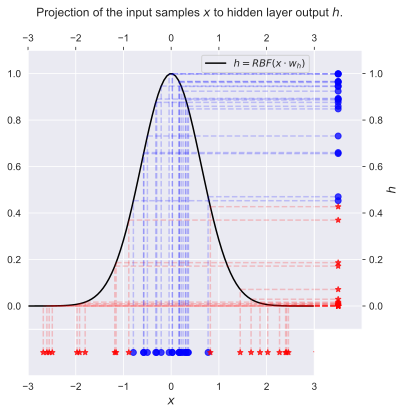

In [18]:
# Illustrate the transformation of x to h
plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(2, 2, width_ratios=[6, 1], height_ratios=[6, 1])
gs.update(wspace=0., hspace=0.)
plt.suptitle(
    'Projection of the input samples $x$ '
    'to hidden layer output $h$.')

# Plot input
ax_in = plt.subplot(gs[2])
ax_in.plot(xs_c, np.zeros_like(xs_c), 'bo', alpha=0.75)
ax_in.plot(xs_d, np.zeros_like(xs_d), 'r*', alpha=0.75)
ax_in.yaxis.set_visible(False)
ax_in.set_xlabel('$x$', fontsize=12)
ax_in.set_xlim(-3,3)
ax_in.set_ylim(-1,1)
# Plot red star projections
for xr in xs_d:
    ax_in.plot((xr, xr), (0, 1), 'r--', alpha=0.2)
# Plot blue circle projections
for xb in xs_c:
    ax_in.plot((xb, xb), (0, 2), 'b--', alpha=0.2)

# Plot RBF function
ax_rbf = plt.subplot(gs[0])
xs_rbf = np.linspace(-3, 3, 100)
ax_rbf.plot(
    xs_rbf, hidden_activations(xs_rbf, wh), 
    'k-', label='$h = RBF(x \cdot w_h)$')
ax_rbf.legend()
ax_rbf.set_xlim(-3, 3)
ax_rbf.set_ylim(-0.1, 1.1)
ax_rbf.xaxis.set_ticks_position('top')
# Plot red star projections
for xr in xs_d:
    xr = float(xr)
    h = hidden_activations(xr, wh)
    ax_rbf.plot((xr, xr), (-0.1, h), 'r--', alpha=0.2)
    ax_rbf.plot((xr, 3), [h, h], 'r--', alpha=0.2)
# Plot blue circle projections
for xb in xs_c:
    xb = float(xb)
    h = hidden_activations(xb, wh)
    ax_rbf.plot((xb, xb), (-0.1, h), 'b--', alpha=0.2)
    ax_rbf.plot((xb, 3), [h, h], 'b--', alpha=0.2)

# Plot output
ax_out = plt.subplot(gs[1])
ax_out.plot(
    np.zeros_like(xs_c), hidden_activations(xs_c, wh), 
    'bo', alpha=0.75)
ax_out.plot(
    np.zeros_like(xs_d), hidden_activations(xs_d, wh), 
    'r*', alpha=0.75)
ax_out.xaxis.set_visible(False)
ax_out.yaxis.set_label_position('right')
ax_out.yaxis.set_ticks_position('right')
ax_out.set_ylabel('$h$', fontsize=12)
ax_out.set_ylim(-0.1, 1.1)
ax_out.set_xlim(-1, 1)
# Plot red star projections
for xr in xs_d:
    h = hidden_activations(xr, wh)
    ax_out.plot((-1, 0), (h, h), 'r--', alpha=0.2)
# Plot blue circle projections
for xb, in xs_c:
    h = hidden_activations(xb, wh)
    ax_out.plot((-1, 0), (h, h), 'b--', alpha=0.2)

plt.show()
#
